# Полносвязная нейронная сеть

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

Скачивание датасета.

Загрузка набора данных возвращает четыре массива NumPy: train_images и train_labels представляют собой обучающий набор — данные, которые модель использует для обучения.
Модель тестируется на тестовом наборе , test_images и test_labels .

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Рассмотрим входные данные:

60 тыс. изображений 28х28 для тренировочной выборки:

In [ ]:
train_images.shape

(60000, 28, 28)

60 тыс. меток тренировочной выборки: 

In [ ]:
len(train_labels)

60000

Массив меток содержит числа от 0 до 9: 

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

10 тыс. изображений 28х28 для тестовой: 

In [ ]:
test_images.shape

(10000, 28, 28)

10 тыс. меток тестовой:

In [ ]:
len(test_labels)

10000

Названия для удобства в массиве с индексами, соответсвующими меткам:

In [ ]:
class_names = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Плащ',
               'Сандалии', 'Рубашка', 'Кроссовок', 'Сумка', 'Туфли']

Отображение первых 25 изображений из обучающей выборки

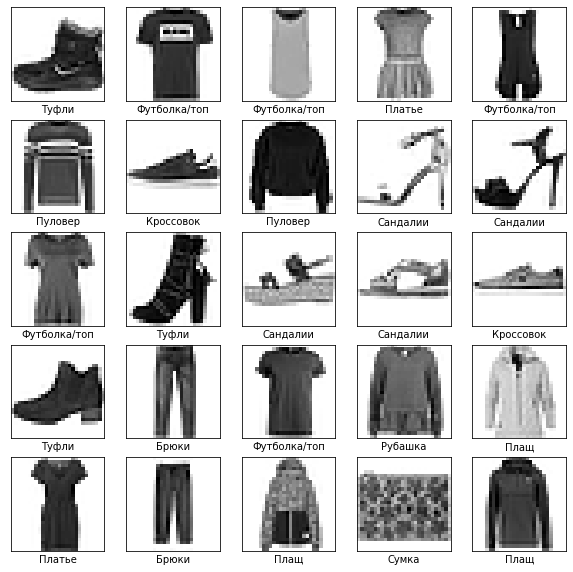

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Стандартизация входных данных.

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

Создание модели с одним скрытым слоем

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Первый слой Flatten преобразует формат изображения из двумерного массива (28 на 28 пикселей) в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. Этот слой не имеет параметров для обучения; он только переформатирует данные.

Далее нейросеть содержит два полносвязных слоя Dense. Первый Dense слой состоит из 128 нейронов и имеет функцию активации relu<span>*</span>. Второй - выходной слой - 10-узловой с функцией активации softmax<span>*</span>. Слой возвращает массив из 10 вероятностных оценок дающих в сумме 1. Каждый нейрон содержит оценку, указывающую вероятность принадлежности изображения к одному из 10 классов.

<span>*</span>Функция активации relu выбрана, так как она проста в вычислениях и нелинейна. softmax удобно использовать в работе с вероятностями, так как она подобно сигмоиде возвращает значения в пределах от 0 до 1, а также сумма результатов будет равна 1.

In [ ]:
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Компиляция нейронной сети с оптимизатором adam, в качестве функции потерь используется категориальная кросс-энтропия, т.к. из-за свойств логарифма она лучше работает с вероятностями. Метрика accuracy равна доле правильно классифицированных изображений.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели с 10-ю эпохами, размером пакета в 32 изображения, валидационной выборкой в 20%

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5202 - accuracy: 0.8177 - val_loss: 0.4555 - val_accuracy: 0.8293
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8585 - val_loss: 0.3754 - val_accuracy: 0.8596
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8728 - val_loss: 0.3815 - val_accuracy: 0.8637
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3235 - accuracy: 0.8797 - val_loss: 0.3384 - val_accuracy: 0.8778
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3030 - accuracy: 0.8879 - val_loss: 0.3339 - val_accuracy: 0.8746
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.8941 - val_loss: 0.3504 - val_accuracy: 0.8720
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2761 - accuracy: 0.8985 - val_loss: 0.3288 - val_accuracy:

Проверим точность на тестовых данных:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8722


[0.424822062253952, 0.8722000122070312]

Как видим, такая модель достигает точности <b>около 87%</b>

# Сверточная нейронная сеть

Модель с сверточными слоями:

In [ ]:
conv_model = keras.Sequential([
    Conv2D(10, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(20, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10,  activation='softmax')
])
conv_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 20)        1820      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 20)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 980)               0         
                                                                 
 dense_16 (Dense)            (None, 64)               

Компиляция модели сверточной сети:

In [ ]:
conv_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Обучение:

In [ ]:
conv_model.fit(train_images, train_labels, batch_size = 32, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8174 - val_loss: 0.4351 - val_accuracy: 0.8372
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8741 - val_loss: 0.3401 - val_accuracy: 0.8781
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3065 - accuracy: 0.8895 - val_loss: 0.2951 - val_accuracy: 0.8942
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.9004 - val_loss: 0.2996 - val_accuracy: 0.8863
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2533 - accuracy: 0.9075 - val_loss: 0.2719 - val_accuracy: 0.9020
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2327 - accuracy: 0.9141 - val_loss: 0.2821 - val_accuracy: 0.8982
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2165 - accuracy: 0.9209 - val_loss: 0.2692 - val_accuracy:

Проверим точность на тестовых данных:

In [ ]:
conv_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2802 - accuracy: 0.9037


[0.28016385436058044, 0.9036999940872192]

Модель сверточной нейронной сети c меньшим количеством параметром достигает более высокой точности – <b>около 90%</b>. 
Таким образом, на простом примере мы увидели, что CNN работают эффективнее.